# Introduction
The May edition of the 2022 Tabular Playground series binary classification problem. 
> For this challenge, we have been given (simulated) manufacturing control data and are tasked to predict whether the machine is in state 0 or state 1. The data has various feature interactions that may be important in determining the machine state.

# 1. Data Extraction

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
sns.set()

from scipy.stats import chi2_contingency

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
train_df = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')
test_df  = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv')

In [ ]:
train_df.shape

In [ ]:
train_df.head(5)

In [ ]:
train_df.describe()

In [ ]:
train_df.info()

In [ ]:
n = train_df.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

In [ ]:
duplicate = train_df[train_df.duplicated()]
 
print("Duplicate rows count:",duplicate.count())

In [ ]:
train_df.isnull().sum()

# 2. Data Visualization

In [ ]:
sns.countplot(x="target", data=train_df)

In [ ]:
train_df.hist(bins=30, figsize=(15, 10))

# 3. Feature Engineering

**Chi Squared Test:**
A chi-squared test is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis. Chi-square tests are often used in hypothesis testing. 

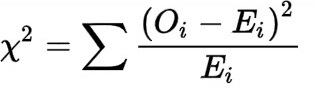

The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

In [ ]:
lst = []
for col in train_df.columns:
    ct = pd.crosstab(train_df[col],train_df['target'])
    
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)
    
    # interpret p-value
    alpha = 0.05
    
    if p <= alpha:
        op='Yes'
    else:
        op='No'       
    lst.append([col, round(p,10), op])
op=['Source Column','P Value','Dependent on Target Col']
df = pd.DataFrame(lst, columns=op)

In [ ]:
print(df)

In [ ]:
plt.figure(figsize=(23,23))
corr=train_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(23, 23))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
g=sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Id = test_df['id']
train_df = train_df.drop(['id','f_27'], axis=1)
test_df = test_df.drop(['id','f_27'], axis=1)

In [ ]:
X = train_df.drop("target", axis=1)
y = train_df["target"]
X_test = test_df

In [ ]:
X.shape,y.shape,X_test.shape

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

# 4. Model Training

In [ ]:
model = Sequential() 
model.add(Dense(256, activation='relu', input_dim=30))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200,batch_size=4096)

In [ ]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
y_predicted = model.predict(X_valid)
#mat = confusion_matrix(y_valid, y_predicted)
#labels = ['Legitimate', 'Fraudulent']
 
#sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
 
#plt.xlabel('Predicted label')
#plt.ylabel('Actual label')

In [ ]:
y_predicted

In [ ]:
y_pred_x = model.predict(X_test)
y_pred_x = y_pred_x.flatten()

In [ ]:
#y_pred_x = y_pred_x*1
#y_pred_x = y_pred_x.flatten()

In [ ]:
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'id':Id,'target':y_pred_x})

In [ ]:
 submission.target = submission.target.round(2)

In [ ]:
submission.head(5)

In [ ]:
submission.to_csv('submission.csv',index=False)